## Advertising Data

In this project, I will be working with an advertising dataset to predict whether an internet user will click on an advertisement based on their features. The goal is to build a predictive model that accurately determines the likelihood of a user clicking on an ad.

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [12]:
ad_data = pd.read_csv('/Users/pushpita/Downloads/advertising.csv')

In [14]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


This dataset has both categorical and numerical columns. 
This data set contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [18]:
# Statistical summary of the dataset
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [20]:
# Summary of the dataset
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

In [25]:
# Set the visual style of the Seaborn plots to 'whitegrid'
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Distribution of Age')

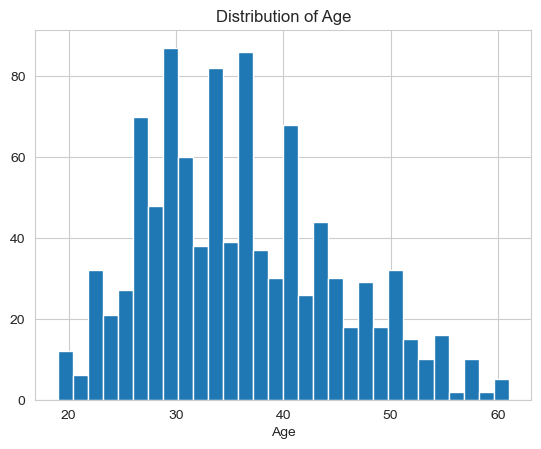

In [27]:
# Histogram of the 'Age' column with 30 bins to visualize the distribution of ages in the dataset
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age')

Text(0.05, 0.95, 'Pearson r = -0.18\nP-value = 6.02e-09')

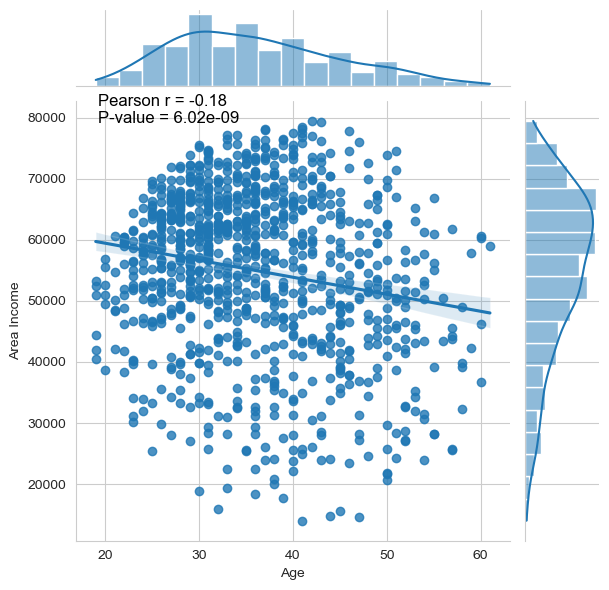

In [65]:
# Create a jointplot to explore the relationship between Age and Area Income
joint_plot = sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='reg')

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(ad_data['Age'], ad_data['Area Income'])

# Annotate the plot with Pearson's r and p-value
joint_plot.ax_joint.annotate(f'Pearson r = {r_value:.2f}\nP-value = {p_value:.3g}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black')

Text(0.5, 0.1, 'Pearson r = -0.33\nP-value = 4.45e-27')

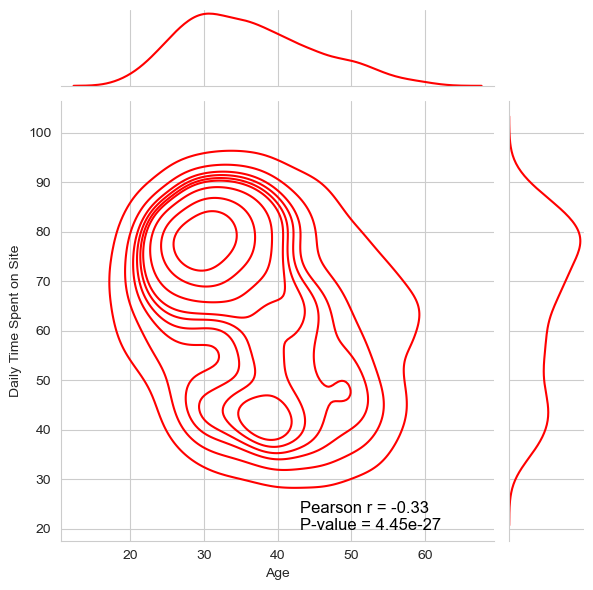

In [63]:
# KDE jointplot to explore the relationship between Age and Daily Time Spent on Site
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='red', kind='kde')

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(ad_data['Age'], ad_data['Daily Time Spent on Site'])

# Annotate the plot with Pearson's r and p-value
plt.annotate(f'Pearson r = {r_value:.2f}\nP-value = {p_value:.3g}', xy=(0.5, 0.1), xycoords='figure fraction', fontsize=12, color='black')

Text(0.7, 0.1, 'Pearson r = 0.52\nP-value = 0.000')

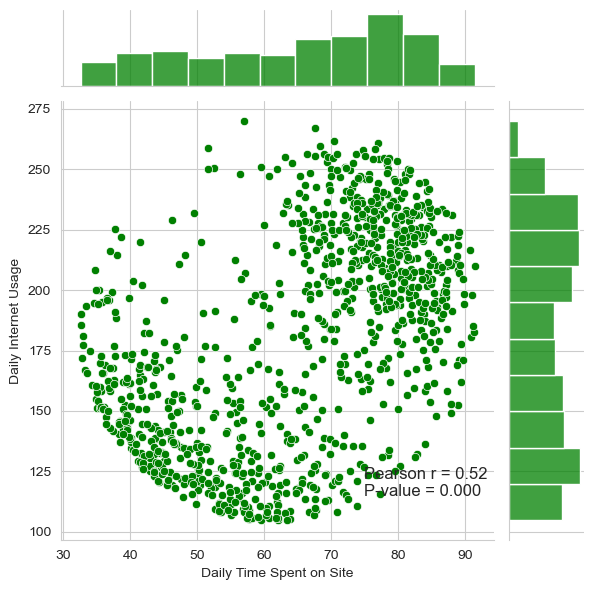

In [55]:
# Calculating Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])

# Creating jointplot
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

# Annotatating the plot with Pearson's r and p-value
plt.annotate(f'Pearson r = {r_value:.2f}\nP-value = {p_value:.3f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)

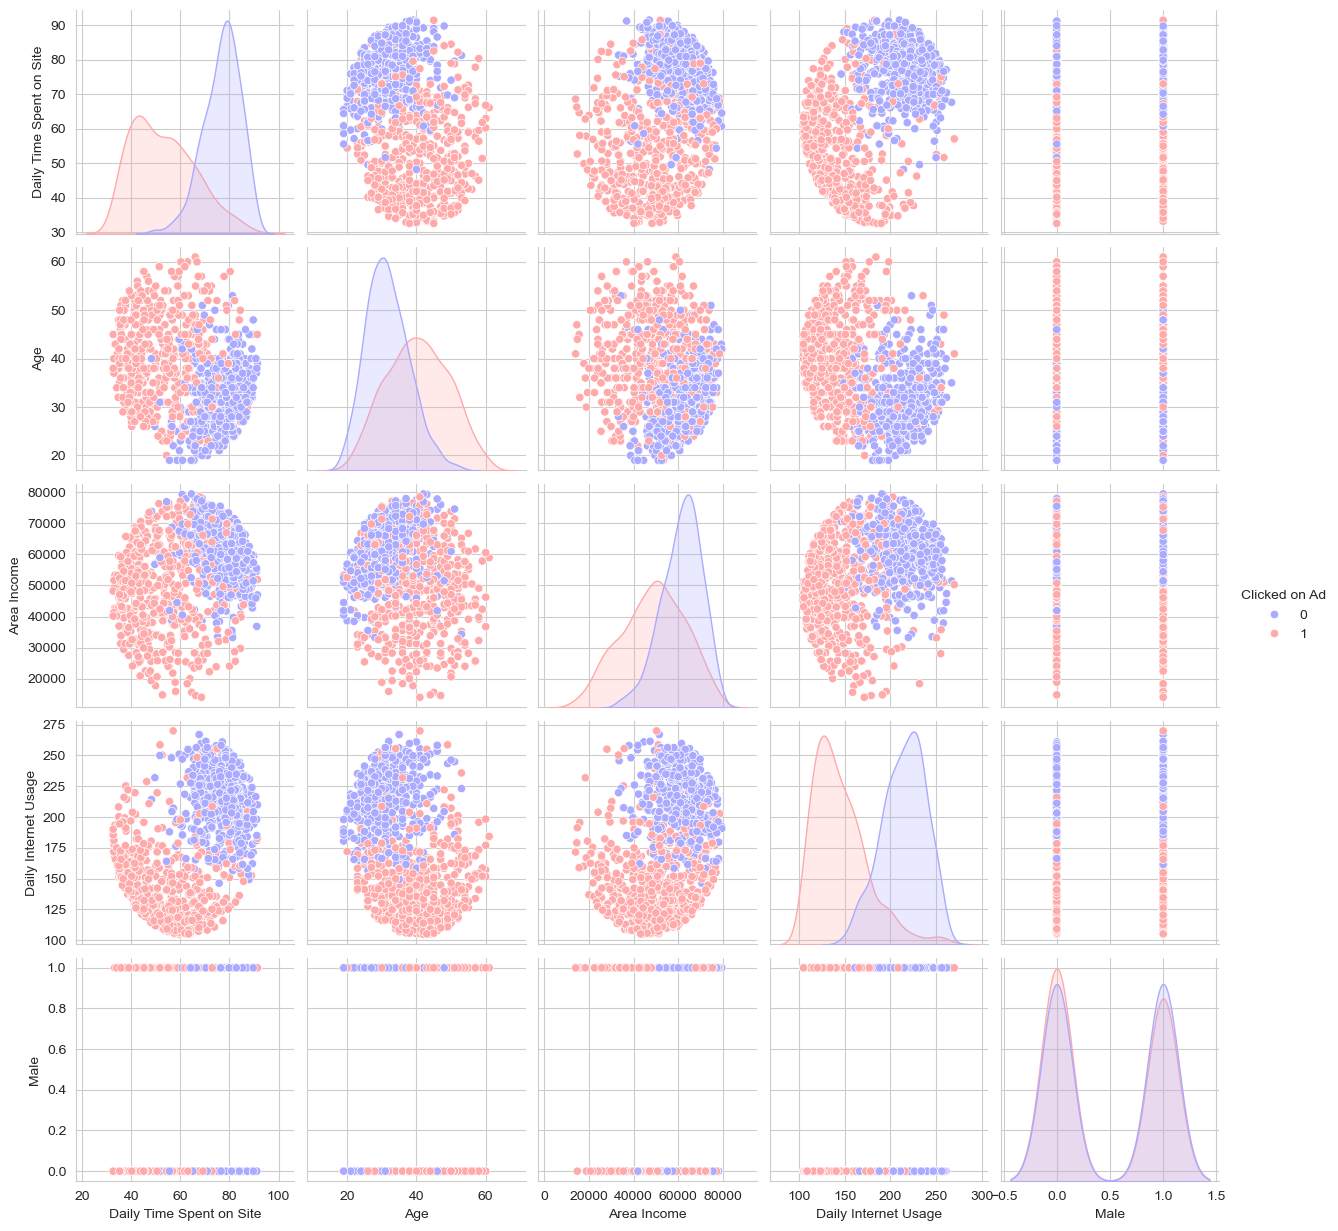

In [69]:
# Generating pairplot to visualize relationships between features, colored by ad click status
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr')

## Logistic Regression

In [72]:
# Import train_test_split to split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

In [74]:
# Define the feature matrix X with selected numerical features and 'Male' indicator
# Define the target variable y as the column indicating whether the ad was clicked
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [78]:
# Split the data into training and testing sets with 33% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
# Import LogisticRegression for building a logistic regression model to predict ad clicks
from sklearn.linear_model import LogisticRegression

In [84]:
# Initialize the Logistic Regression model
# Fit the model on the training data
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predictions & Evaluations

In [91]:
# Use the trained logistic regression model to predict the target variable on the test data
predictions = logmodel.predict(X_test)

In [102]:
# Import classification_report to evaluate the performance of the classification model
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
# Print the classification report to evaluate model performance on the test set
# This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

[[158   4]
 [  7 161]]


## Conclusion

The logistic regression model developed to predict ad clicks based on user data performed effectively, achieving an overall accuracy of 97%. Both classes—users who clicked on the ad (Class 1) and users who did not click on the ad (Class 0)—were predicted with high precision and recall, indicating that the model is well-balanced and accurate.

Key Findings:

Class 0 (No Click): Precision of 96%, Recall of 98%, and F1-Score of 97%.
Class 1 (Click): Precision of 98%, Recall of 96%, and F1-Score of 97%.
The model demonstrates strong performance in identifying both click and non-click events, making it a reliable tool for predicting user interactions with ads. Further improvements could involve experimenting with additional features, more advanced algorithms, or hyperparameter tuning to potentially enhance performance even further.